# Start of Data 1: Resale flat prices based on registration date from Jan-2017 onwards

## 1. Load Data

### 1.1 Define function to load and verify if data is successfully load, else report error

In [ ]:
def load_and_verify_data(fname):
    # Define the dtype for numpy
    dtype = [('month', 'datetime64[M]'), ('town', 'U50'), ('flat_type', 'U50'), ('block', 'U50'),
             ('street_name', 'U50'), ('storey_range', 'U50'), ('floor_area_sqm', 'f8'),
             ('flat_model', 'U50'), ('lease_commence_date', 'i8'), ('remaining_lease', 'U50'),
             ('resale_price', 'i8')]

    try:
        # Try loading the data with numpy's np.genfromtxt()
        data = np.genfromtxt(fname, skip_header=1, delimiter=',', dtype=dtype,
                             missing_values=['na', '-'], filling_values=[0])
        print("Data successfully loaded using np.genfromtxt().\n")
    except Exception as e:
        print(f"np.genfromtxt() could not be executed: {e}. Trying pandas read_csv()...\n")

        try:
            # if unable to load, use pandas read_csv()
            df = pd.read_csv(fname)
            print("Data successfully loaded using pd.read_csv().\n")

            # Convert DataFrame to CSV
            temp_csv = 'temp_data.csv'
            df.to_csv(temp_csv, index=False)
            print(f"Data converted to CSV and saved as {temp_csv}\n")

            # try using np.genfromtxt() on the new CSV file
            data = np.genfromtxt(temp_csv, skip_header=1, delimiter=',', dtype=dtype,
                                 missing_values=['na', '-'], filling_values=[0])
            print("Data successfully loaded from the converted CSV using np.genfromtxt().\n")

        except Exception as e:
            print(f"All attempts to load the data failed. Error: {e}\n")
            return None

    if data is not None:
        print("Data loaded successfully. First 5 rows:\n")
        print(data[:5])  # Print the first 5 rows to verify
    else:
        print(f"Failed to load file: {fname}.")

    return data

### 1.2 Load Data

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File name
fname1 = 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv'

# Load Data
sales_data = load_and_verify_data(fname1)

Data successfully loaded using np.genfromtxt().

Data loaded successfully. First 5 rows:

[('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000)]


## 2. Data Overview

### 2.1 Check data dimensions

In [ ]:
print(f"Number of rows: {len(sales_data)}")
print(f"Number of columns: {len(sales_data[0])}")

Number of rows: 182868
Number of columns: 11


### 2.2 Define function to determine if data is qualitative or quanitative

In [ ]:
# Function to classify the data types into Qualitative and Quantitative
def classify_dtype(dtype):
  if np.issubdtype(dtype, np.number):
    return 'Quantitative'
  elif np.issubdtype(dtype, np.str_):
    return 'Qualitative'
  elif np.issubdtype(dtype, np.datetime64):
    return 'Quantitative'
  else:
    return 'Others'

# Function to further classify qualitative data
def classify_qualitative(data, column_name):
  unique_values = np.unique(data[column_name])
  if len(unique_values) <= 10:  # Arbitrary threshold for example
    return 'Nominal'
  else:
    return 'Ordinal'

# Function to further classify quantitative data
def classify_quantitative(data, column_name):
    unique_values = np.unique(data[column_name])
    if np.issubdtype(unique_values.dtype, np.number):
      if np.all(np.floor(unique_values) == unique_values):
        return 'Discrete'
      else:
        return 'Continuous'
    else:
        return 'Others'


In [ ]:
# Check and classify each column
column_names = sales_data.dtype.names
classification = {} # empty dict

for name in column_names:
    dtype_class = classify_dtype(sales_data[name].dtype)
    if dtype_class == 'Qualitative':
        detail_class = classify_qualitative(sales_data, name)
    elif dtype_class == 'Quantitative':
        detail_class = classify_quantitative(sales_data, name)
    else:
        detail_class = 'Others'
    classification[name] = {'type': dtype_class, 'detail': detail_class}


# Print the classification
for name, class_info in classification.items():
    print(f"'{name.title()}': Data Type - {class_info['type']}; {class_info['detail']} data.\n")

# Print detailed dtype information
print("\nDetailed dtype information:")
print(sales_data.dtype)

'Month': Data Type - Quantitative; Others data.

'Town': Data Type - Qualitative; Ordinal data.

'Flat_Type': Data Type - Qualitative; Nominal data.

'Block': Data Type - Qualitative; Ordinal data.

'Street_Name': Data Type - Qualitative; Ordinal data.

'Storey_Range': Data Type - Qualitative; Ordinal data.

'Floor_Area_Sqm': Data Type - Quantitative; Continuous data.

'Flat_Model': Data Type - Qualitative; Ordinal data.

'Lease_Commence_Date': Data Type - Quantitative; Discrete data.

'Remaining_Lease': Data Type - Qualitative; Ordinal data.

'Resale_Price': Data Type - Quantitative; Discrete data.


Detailed dtype information:
[('month', '<M8[M]'), ('town', '<U50'), ('flat_type', '<U50'), ('block', '<U50'), ('street_name', '<U50'), ('storey_range', '<U50'), ('floor_area_sqm', '<f8'), ('flat_model', '<U50'), ('lease_commence_date', '<i8'), ('remaining_lease', '<U50'), ('resale_price', '<i8')]


## 3. Data Manipulation

### 3.1 Define a function to check if Column in Existing data, if yes update, else create new column

In [ ]:
# Function to check if column exist or add new in data
def add_or_update_col(data, col_name, new_data):

  # Check if column already exits
  if col_name in data.dtype.names:
    print(f"Column {col_name} already exists. Updating values.\n")
    data[col_name] = new_data
  else:
    # Add new column to the structured array
    data = rfn.append_fields(data, col_name, new_data, usemask=False)
    print(f"Added new column '{col_name}'.\n")

  return data

### 3.2 Create new column dollar per squared metre "$psm" to as an alternative measurement

In [ ]:
# Calculate $psm by dividing resale_price by floor_area_sqm
ppsm = sales_data['resale_price'] / sales_data['floor_area_sqm']

# Round the values to 2 decimal points
ppsm = np.round(ppsm, 2)


# Create new numpy structure '$psm' and add as new column or update existing column
import numpy.lib.recfunctions as rfn
sales_data = add_or_update_col(sales_data, '$psm', ppsm)


# Print the first few rows to verify
print(f"Number of unique values: {len(np.unique(sales_data['$psm']))}.\n")
print(sales_data[:5])

Added new column '$psm'.

Number of unique values: 28641.

[('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000, 5272.73)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000, 3731.34)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000, 3910.45)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000, 3897.06)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000, 3955.22)]


### 3.3 Create new column to convert remaining_lease into from string format "YY years, MM months" into integer months format

In [ ]:
# Create a Function to convert "years months" to total months
def convert_to_months(lease):
  import re

  # First pattern: matches "X years Y months"
  match = re.match(r"(\d+) years? (\d+) months?", lease) # if cell "(\d+) years" & "(\d+) months" matches,
  if match:
      years = int(match.group(1)) # if true convert years into int
      months = int(match.group(2)) # if true convert months into int
      return years * 12 + months

  # Second pattern: matches "X years"
  match = re.match(r"(\d+) years?", lease)
  if match:
      years = int(match.group(1))
      return years * 12

  # Third pattern: matches "Y months"
  match = re.match(r"(\d+) months?", lease)
  if match:
      months = int(match.group(1))
      return months

  # Default return value if 0/3 pattern matches
  return 0


In [ ]:
# Create new numpy structure by converting remaining_lease (YYYY-MM) to total months
import numpy.lib.recfunctions as rfn
remaining_lease_months = np.array([convert_to_months(lease) for lease in sales_data['remaining_lease']])


# Update or add new column
sales_data = add_or_update_col(sales_data, 'remaining_lease_months', remaining_lease_months)


# Print the first few rows to verify
print(f"Number of unique values: {len(np.unique(sales_data['remaining_lease_months']))}.\n")
print(sales_data[:5])

Added new column 'remaining_lease_months'.

Number of unique values: 673.

[('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000, 5272.73, 736)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000, 3731.34, 727)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000, 3910.45, 749)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000, 3897.06, 745)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000, 3955.22, 749)]


### 3.4 Create new column to classify town into mature estate or non-mature estate

In [ ]:
# Initial classification of towns
mature_estate = ['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Merah', 'Bukit Timah', 'Central Area', 'Clementi', 'Geylang',
                 'Kallang/Whampoa', 'Marine Parade', 'Pasir Ris', 'Queenstown', 'Serangoon', 'Tampines', 'Toa Payoh']
non_mature_estate = ['Bukit Batok', 'Bukit Panjang', 'Choa Chu Kang', 'Hougang', 'Jurong East', 'Jurong West', 'Punggol',
                     'Sembawang', 'Sengkang', 'Tengah', 'Woodlands', 'Yishun']


# Function to classify town
def classify_town(town):
    if town.title() in mature_estate:
        return 'Mature Estate'
    elif town.title() in non_mature_estate:
        return 'Non-mature Estate'
    else:
        return 'Unknown'


In [ ]:
# Create the new classification to convert town into mature or non_mature estate
estate_classification = np.array([classify_town(town) for town in sales_data['town']], dtype='U20')

# Add or Update new column
sales_data = add_or_update_col(sales_data, 'estate_classification', estate_classification)

# Print the first few rows to verify
print(f"Number of unique values: {len(np.unique(sales_data['estate_classification']))}.\n")
print(sales_data[:5])

Added new column 'estate_classification'.

Number of unique values: 2.

[('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000, 5272.73, 736, 'Mature Estate')
 ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000, 3731.34, 727, 'Mature Estate')
 ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000, 3910.45, 749, 'Mature Estate')
 ('2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000, 3897.06, 745, 'Mature Estate')
 ('2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000, 3955.22, 749, 'Mature Estate')]


## 4. Descriptive Statistics

### 4.1 Find number of unique values in each columns

In [ ]:
def count_unique_values(data):
  # prep dict to store the number of unique values for each column
  unique_counts = {}

  # Loop through each column in the structured array
  for column_name in data.dtype.names:
    unique_counts[column_name] = len(np.unique(data[column_name]))

  return unique_counts

# print results
unique_counts = count_unique_values(sales_data)
unique_counts

{'month': 90,
 'town': 26,
 'flat_type': 7,
 'block': 2709,
 'street_name': 566,
 'storey_range': 17,
 'floor_area_sqm': 172,
 'flat_model': 21,
 'lease_commence_date': 55,
 'remaining_lease': 676,
 'resale_price': 3861,
 '$psm': 28641,
 'remaining_lease_months': 673,
 'estate_classification': 2}

### 4.2a Define a function to compute basic descriptive statistics (mean, median, mode, min, max, count) of numeric column

In [ ]:
def compute_stats(data, col_name, grp=None, filter_value=None):
    # Function to calculate mode using numpy
    def calculate_mode(arr):
        values, counts = np.unique(arr, return_counts=True)
        max_count_index = np.argmax(counts)
        return values[max_count_index]

    # Function to calculate statistics for a given array
    def calculate_stats(arr):
        arr = arr[arr >= 0]  # Exclude invalid values (negative values)
        mean = np.mean(arr)
        mean = np.round(mean, 2)
        median = np.median(arr)
        mode = calculate_mode(arr)
        min_val = np.min(arr)
        max_val = np.max(arr)
        q1 = np.percentile(arr, 25)
        q3 = np.percentile(arr, 75)
        iqr = q3 - q1
        count = len(arr)
        return {
            'mean': mean,
            'median': median,
            'mode': mode,
            'min': min_val,
            'max': max_val,
            'iqr': iqr,
            'count': count
        }

    # Prepare a dictionary to store results
    results = {}

    if grp is not None and filter_value is not None:
        # Filter the data by the specified group
        filter_mask = data[grp] == filter_value
        filtered_data = data[filter_mask]
    else:
        filtered_data = data

    # Extract relevant columns
    column_data = filtered_data[col_name]
    group_data = filtered_data[grp] if grp is not None else None

    # Calculate the statistics for the filtered data
    if group_data is not None:
        unique_groups = np.unique(group_data)

        for group in unique_groups:
            group_mask = group_data == group
            group_column_data = column_data[group_mask]

            results[group] = calculate_stats(group_column_data)
    else:
        results['overall'] = calculate_stats(column_data)

    return results

### 4.2b Define function to sort statistics metric (mean, median, mode, min, max) by descending order

In [ ]:
def sort_stats(stats, metric):
    # Ensure the metric exists in the statistics
    if not all(metric in stats[key] for key in stats):
        raise ValueError(f"Metric '{metric}' not found in statistics.")

    # Sort the results by the specified metric in descending order
    sorted_stats = {k: v for k, v in sorted(stats.items(), key=lambda item: item[1][metric], reverse=True)}

    return sorted_stats


### 4.2c Define function to print compute_stats

In [ ]:
def print_stats(results, col_name, grp=None):
  # Display the results
  print(f"\nStatistics for {col_name.title()}{' by ' + grp.title() if grp else ' Overall'}:")
  for key, stats in results.items():
    print(f"\nGroup: {key}")
    for stat_name, value in stats.items():
      print(f"{stat_name.capitalize()}: {value:.2f}" if stat_name != 'count' else f"{stat_name.capitalize()}: {value}")
    print("-" * 40)

### 4.3 Descriptive Statistics for floor_area_sqm by town

In [ ]:
floor_area_by_town = compute_stats(sales_data, 'floor_area_sqm', 'town')
sorted_floor_area = sort_stats(floor_area_by_town, 'mean')
print_stats(sorted_floor_area, 'floor_area_sqm', 'town')


Statistics for Floor_Area_Sqm by Town:

Group: PASIR RIS
Mean: 120.02
Median: 122.00
Mode: 104.00
Min: 47.00
Max: 190.00
Iqr: 38.00
Count: 5419
----------------------------------------

Group: BUKIT TIMAH
Mean: 109.29
Median: 104.00
Mode: 104.00
Min: 63.00
Max: 154.00
Iqr: 36.00
Count: 458
----------------------------------------

Group: CHOA CHU KANG
Mean: 108.24
Median: 106.00
Mode: 104.00
Min: 46.00
Max: 215.00
Iqr: 28.00
Count: 8374
----------------------------------------

Group: BISHAN
Mean: 107.99
Median: 105.00
Mode: 121.00
Min: 63.00
Max: 243.00
Iqr: 32.00
Count: 3306
----------------------------------------

Group: WOODLANDS
Mean: 105.83
Median: 102.00
Mode: 93.00
Min: 37.00
Max: 192.00
Iqr: 29.00
Count: 12941
----------------------------------------

Group: TAMPINES
Mean: 104.48
Median: 104.00
Mode: 104.00
Min: 45.00
Max: 190.00
Iqr: 38.00
Count: 12252
----------------------------------------

Group: BUKIT PANJANG
Mean: 102.13
Median: 103.00
Mode: 93.00
Min: 46.00
Max: 155.

Top 3 Average Floor Area by Town are:
- Pasir Ris, Bukit Timah, and Choa Chu Kang, with the average of 120sqm, 102.3sqm, and 108.2sqm respectively

### 4.4 Descriptive Statistics for resale_price by town

In [ ]:
resale_price_by_town = compute_stats(sales_data, 'resale_price', 'town')
sorted_resale_price = sort_stats(resale_price_by_town, 'mean')
print_stats(sorted_resale_price, 'Resale_Price', 'town')


Statistics for Resale_Price by Town:

Group: BUKIT TIMAH
Mean: 744882.06
Median: 732888.00
Mode: 450000.00
Min: 300000.00
Max: 1410000.00
Iqr: 340000.00
Count: 457
----------------------------------------

Group: BISHAN
Mean: 682848.46
Median: 668000.00
Mode: 550000.00
Min: 210000.00
Max: 1538000.00
Iqr: 278200.00
Count: 3304
----------------------------------------

Group: CENTRAL AREA
Mean: 661696.50
Median: 535888.00
Mode: 500000.00
Min: 200000.00
Max: 1515000.00
Iqr: 499000.00
Count: 1475
----------------------------------------

Group: QUEENSTOWN
Mean: 613846.43
Median: 645000.00
Mode: 350000.00
Min: 182000.00
Max: 1418000.00
Iqr: 452000.00
Count: 5027
----------------------------------------

Group: BUKIT MERAH
Mean: 612176.83
Median: 630000.00
Mode: 750000.00
Min: 157000.00
Max: 1588000.00
Iqr: 410000.00
Count: 7024
----------------------------------------

Group: KALLANG/WHAMPOA
Mean: 561759.48
Median: 540000.00
Mode: 350000.00
Min: 185000.00
Max: 1308000.00
Iqr: 385000.00
Cou

Top 3 Average Resale Price by Town are:
- Bukit Timah, Bishan, and Central Area, with the average of price of 744.9k, 682.8k, and 661.7k respectively.

### 4.5 Descriptive Statistics for $psm by town

In [ ]:
ppsm_by_town = compute_stats(sales_data, '$psm', 'town')
sorted_ppsm = sort_stats(ppsm_by_town, 'mean')
print_stats(sorted_ppsm, '$psm', 'town')


Statistics for $Psm by Town:

Group: CENTRAL AREA
Mean: 7879.98
Median: 7378.05
Mode: 7000.00
Min: 3722.63
Max: 15591.40
Iqr: 3428.99
Count: 1475
----------------------------------------

Group: QUEENSTOWN
Mean: 7261.91
Median: 7157.89
Mode: 5000.00
Min: 3300.00
Max: 13855.42
Iqr: 3378.67
Count: 5027
----------------------------------------

Group: BUKIT MERAH
Mean: 6933.77
Median: 6547.62
Mode: 5000.00
Min: 3200.00
Max: 14178.57
Iqr: 2999.34
Count: 7024
----------------------------------------

Group: BUKIT TIMAH
Mean: 6724.86
Median: 6593.41
Mode: 6250.00
Min: 4615.38
Max: 9672.13
Iqr: 919.32
Count: 457
----------------------------------------

Group: KALLANG/WHAMPOA
Mean: 6370.93
Median: 5847.46
Mode: 5000.00
Min: 2960.53
Max: 13274.37
Iqr: 2692.43
Count: 5500
----------------------------------------

Group: BISHAN
Mean: 6294.42
Median: 6119.09
Mode: 5000.00
Min: 3088.24
Max: 12816.67
Iqr: 1279.06
Count: 3304
----------------------------------------

Group: MARINE PARADE
Mean: 6170

Top 3 Average Price/sqm by Town are:
- Central Area, QueensTown, and Bukit Timah with the average \$7.9k/sqm, \$7.3k/sqm, and \$6.9k/sqm respectively.


## 5. Data Visualization

### 5.1 Histogram: Resale Price Distribution

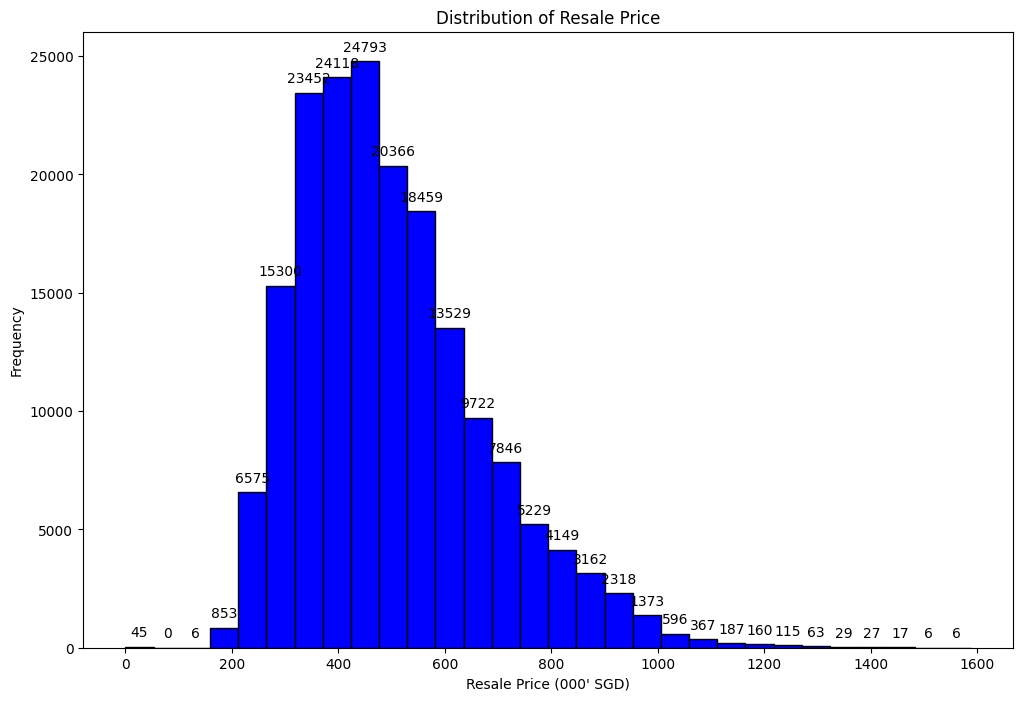

In [ ]:
# Plot the histogram on the number of transactions based on price
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(sales_data['resale_price'] / 1000, bins=30, color='blue', edgecolor='black')

# Add data values to the histogram
for count, patch in zip(counts, patches):
    plt.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, count),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of Resale Price')
plt.xlabel("Resale Price (000' SGD)")
plt.ylabel('Frequency')
plt.show()


In [ ]:
compute_stats(sales_data, 'resale_price')

{'overall': {'mean': 498866.63,
  'median': 469000.0,
  'mode': 450000,
  'min': 140000,
  'max': 1588000,
  'iqr': 225000.0,
  'count': 182823}}

Histogram observation(s):
* The majority of resale flat transactions occur between 200,000 and 800,000 SGD.
* The most frequent resale price range is around 400,000 to 500,000 SGD.
* The distribution is right-skewed, with most transactions at lower prices and fewer transactions at higher prices.



### 5.2 Bar Chart: Number of Transaction per Town

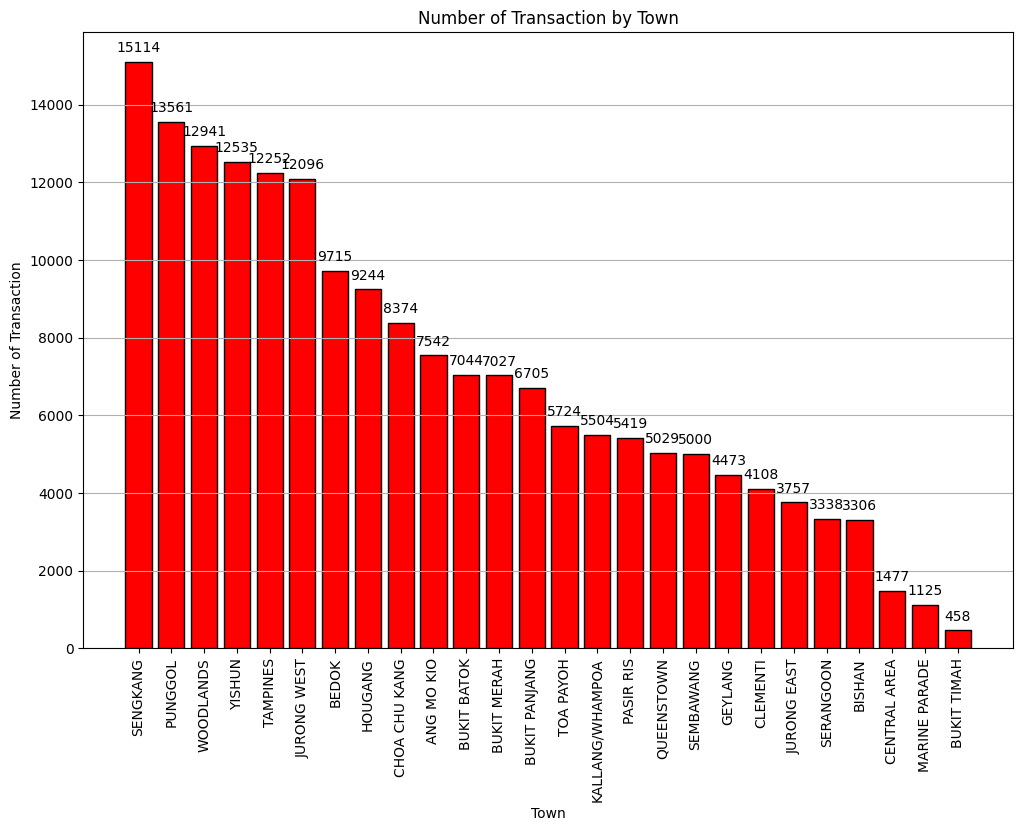

In [ ]:
# Count the occurrences of each town
unique_towns, counts = np.unique(sales_data['town'], return_counts=True)

# Sort the Towns by Count in Descending Order
sorted_indices = np.argsort(counts)[::-1]
sorted_towns = unique_towns[sorted_indices]
sorted_counts = counts[sorted_indices]

# Plot the histogram of the sorted Towns
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_towns, sorted_counts, color='red', edgecolor='black')

# Add data values to the bars
for bar, count in zip(bars, sorted_counts):
    height = bar.get_height()
    plt.annotate(f'{int(count)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Transaction by Town')
plt.xlabel('Town')
plt.ylabel('Number of Transaction')
plt.xticks(rotation=90)
plt.grid(True, axis='y')

# Show the plot
plt.show()


[Top 3 Sales over the entire period are:
- Sengkang, Punngol and Woodlands with 15.1k, 13.6k and 12.9k transactions throughout 2017 to 2024. ](https://)

### 5.3 Pie Chart: Proportion of Flat Types

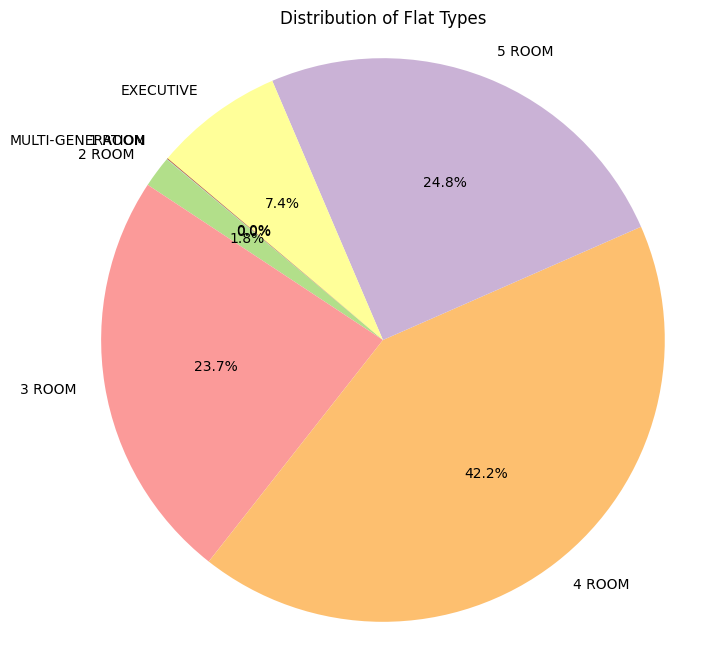

In [ ]:
# Count the occurrences of each flat type
unique_flat_types, flat_counts = np.unique(sales_data['flat_type'], return_counts=True)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(flat_counts, labels=unique_flat_types, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(np.linspace(0, 1, len(unique_flat_types))))
plt.title('Distribution of Flat Types')
plt.axis('equal')
plt.show()


Top 3 Flat Type over the entire period are:
- 4 rooms, 5 rooms, and 3 rooms with 42.2%, 24.8%, and 23.5& respectively.

### 5.4 Line Chart: Average Resales Price Over Time

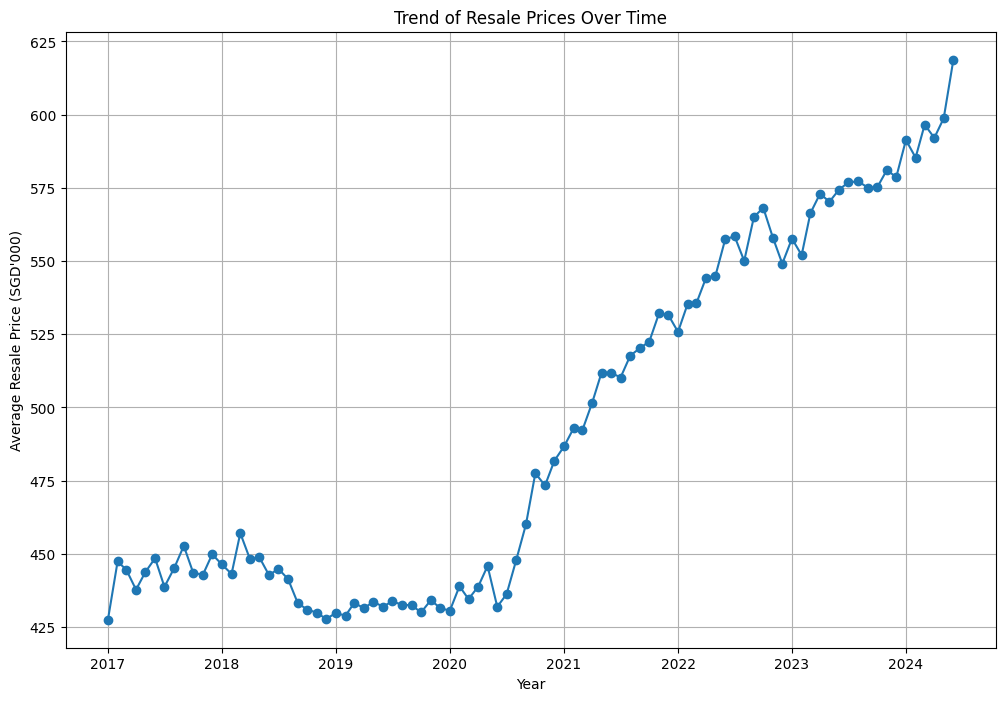

In [ ]:
# Calculate the average resale price per month
months = sales_data['month']
prices = sales_data['resale_price']/1000
unique_months = np.unique(months)
average_prices = [np.mean(prices[months == month]) for month in unique_months]

# Plot the line chart
plt.figure(figsize=(12, 8))
plt.plot(unique_months, average_prices, marker='o')

plt.title('Trend of Resale Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Resale Price (SGD\'000)')
plt.grid(True)
plt.show()


Price of Average Resale Price skyrocketed in late 2020. This was also the Covid period where residents are advised to stay home unless essential workers.

### 5.5 Scatter Plot: Resale Price vs Floor Area

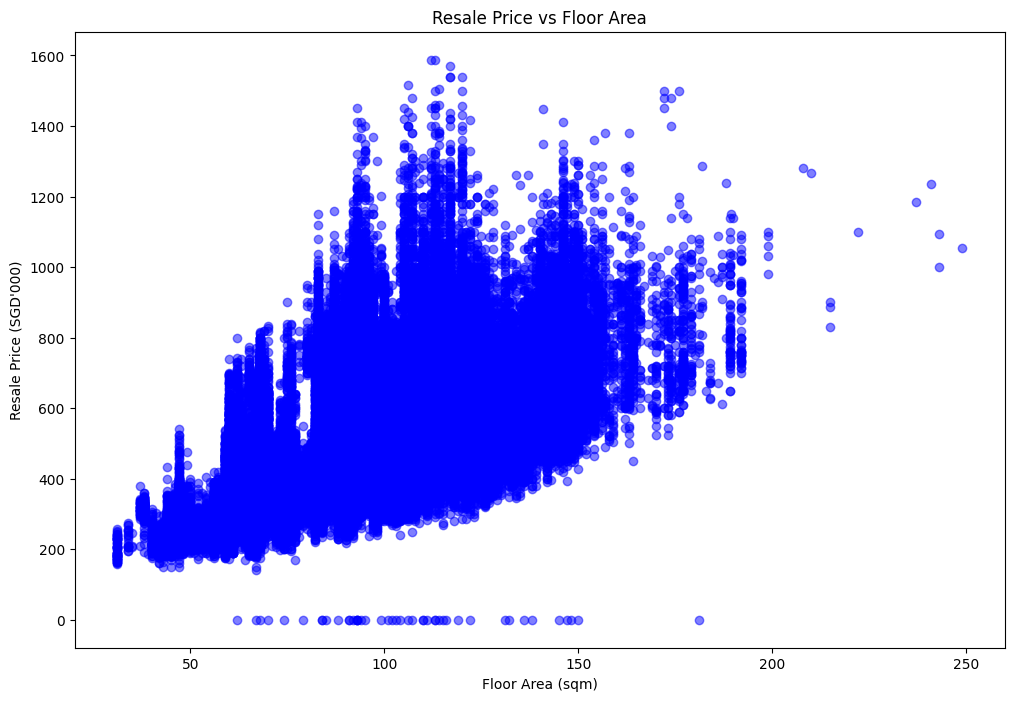

In [ ]:
# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(sales_data['floor_area_sqm'], sales_data['resale_price']/1000, alpha=0.5, color='blue')
plt.title('Resale Price vs Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD\'000)')
plt.show()


### 5.6 Box plot: Distribution of Resale Price by Town

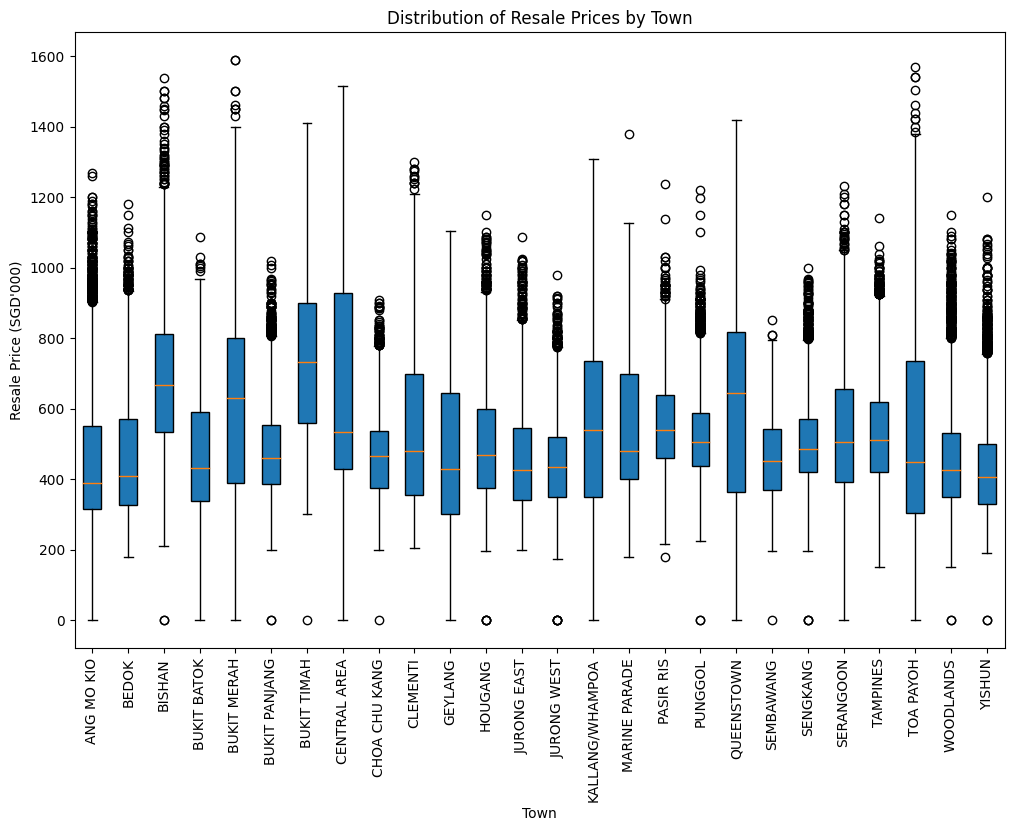

In [ ]:
# Prepare data for boxplot
towns = np.unique(sales_data['town'])
resale_price_thousands = sales_data['resale_price']/1000
boxplot_data = [resale_price_thousands[sales_data['town'] == town] for town in towns]

# Plot the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=towns, vert=True, patch_artist=True)
plt.title('Distribution of Resale Prices by Town')
plt.xlabel('Town')
plt.ylabel('Resale Price (SGD\'000)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
resale_price_by_town = compute_stats(sales_data, 'resale_price', 'town')
resale_price_sorted = sort_stats(resale_price_by_town, 'iqr')
print_stats(resale_price_sorted, 'resale_price', 'town')


Statistics for Resale_Price by Town:

Group: CENTRAL AREA
Mean: 661696.50
Median: 535888.00
Mode: 500000.00
Min: 200000.00
Max: 1515000.00
Iqr: 499000.00
Count: 1475
----------------------------------------

Group: QUEENSTOWN
Mean: 613846.43
Median: 645000.00
Mode: 350000.00
Min: 182000.00
Max: 1418000.00
Iqr: 452000.00
Count: 5027
----------------------------------------

Group: TOA PAYOH
Mean: 526407.97
Median: 450000.00
Mode: 280000.00
Min: 140000.00
Max: 1568888.00
Iqr: 430000.00
Count: 5722
----------------------------------------

Group: BUKIT MERAH
Mean: 612176.83
Median: 630000.00
Mode: 750000.00
Min: 157000.00
Max: 1588000.00
Iqr: 410000.00
Count: 7024
----------------------------------------

Group: KALLANG/WHAMPOA
Mean: 561759.48
Median: 540000.00
Mode: 350000.00
Min: 185000.00
Max: 1308000.00
Iqr: 385000.00
Count: 5500
----------------------------------------

Group: GEYLANG
Mean: 478624.86
Median: 430000.00
Mode: 300000.00
Min: 150000.00
Max: 1105000.00
Iqr: 345000.00
Cou

Boxplot observation(s) for Distribution of Resale Prices By Town
* Most towns have median resale prices between 300,000 and 500,000 SGD.
* Towns like Bishan, Bukit Merah, Bukit Timah, and Queenstown have higher median resale prices compared to other towns. Similiarly, these towns (including Central Area) also have large IQRs, indicicating higher variability in resale price.
* Towns like Sembawang, Punggol and Sengkang were among the lowest in IQR, indicating lower variability.
* Towns like Ang Mo Kio, Bishan, Hougang, Punggol, Sengkang, Tampines, Woolands and Yishun show many outliers, suggesting the properties were sold at premium.

### 5.7 Box plot: Distribution of Price/sqm by Town

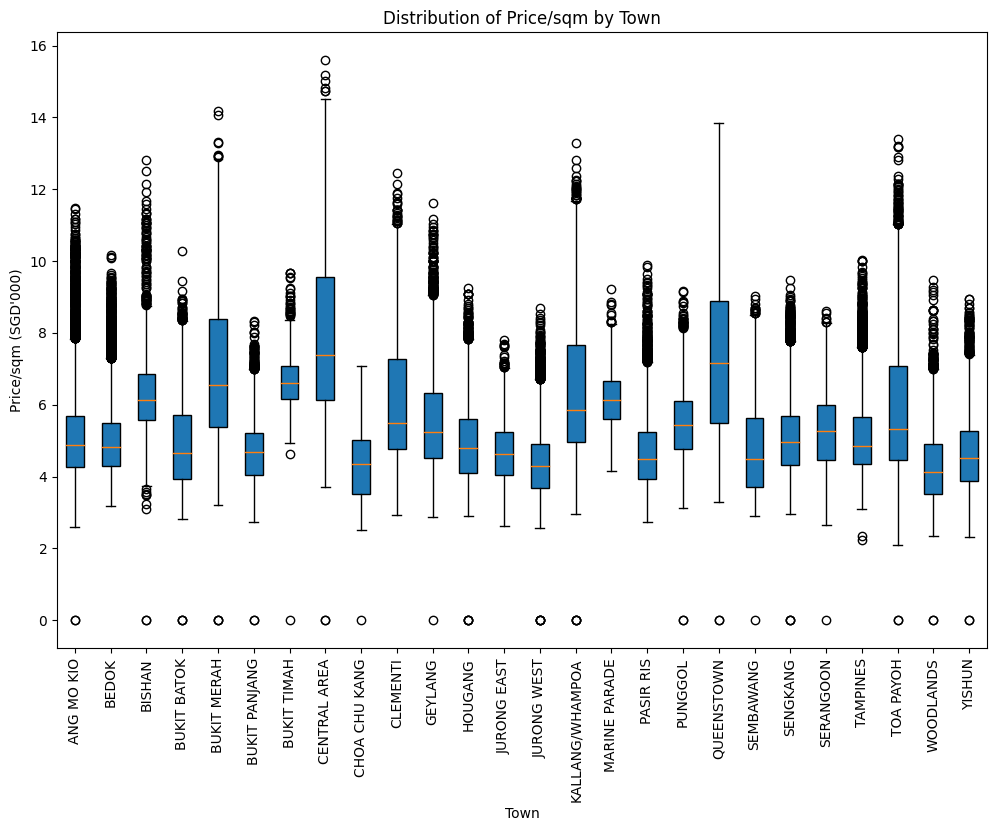

In [ ]:
# Prepare data for boxplot
towns = np.unique(sales_data['town'])
ppsm_thousands = sales_data['$psm']/1000
boxplot_data = [ppsm_thousands[sales_data['town'] == town] for town in towns]

# Plot the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=towns, vert=True, patch_artist=True)
plt.title('Distribution of Price/sqm by Town')
plt.xlabel('Town')
plt.ylabel('Price/sqm (SGD\'000)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
ppsm_by_town = compute_stats(sales_data, '$psm', 'town')
ppsm_sorted = sort_stats(ppsm_by_town, 'iqr')
print_stats(ppsm_sorted, '$psm', 'town')


Statistics for $Psm by Town:

Group: CENTRAL AREA
Mean: 7879.98
Median: 7378.05
Mode: 7000.00
Min: 3722.63
Max: 15591.40
Iqr: 3428.99
Count: 1475
----------------------------------------

Group: QUEENSTOWN
Mean: 7261.91
Median: 7157.89
Mode: 5000.00
Min: 3300.00
Max: 13855.42
Iqr: 3378.67
Count: 5027
----------------------------------------

Group: BUKIT MERAH
Mean: 6933.77
Median: 6547.62
Mode: 5000.00
Min: 3200.00
Max: 14178.57
Iqr: 2999.34
Count: 7024
----------------------------------------

Group: KALLANG/WHAMPOA
Mean: 6370.93
Median: 5847.46
Mode: 5000.00
Min: 2960.53
Max: 13274.37
Iqr: 2692.43
Count: 5500
----------------------------------------

Group: TOA PAYOH
Mean: 5909.01
Median: 5315.51
Mode: 5000.00
Min: 2089.55
Max: 13409.30
Iqr: 2628.43
Count: 5722
----------------------------------------

Group: CLEMENTI
Mean: 6082.59
Median: 5480.77
Mode: 5000.00
Min: 2922.08
Max: 12451.61
Iqr: 2510.82
Count: 4108
----------------------------------------

Group: SEMBAWANG
Mean: 4728.

Boxplot Observation(s) for PPSM by Town:
* Central Area has the highest median price per sqm, suggesting premium nature of properties in this area.
* Central Area, Bukit Merah, and Queenstown show large IQR, indicating high variability in price per sqm.
* Towns like Sembawang, Woodlands, Bukit Batok, and Bukit Timah are among the lowest IQR, indicating uniform property price per sqm.
* Towns like Ang Mo Kio, Bedok, Bishan, Bukit Batok, Hougang, Jurong West, Kallang/Whampoa, Pasir Ris, Tampines, Woolands and Yishun show many outliers, suggesting the properties were sold at significantly higher price/sqm. These outliers could also suggest properties with unique features, driving up the price/sqm.

### 5.8 Box plot: Distribution of Price/sqm by Flat Type

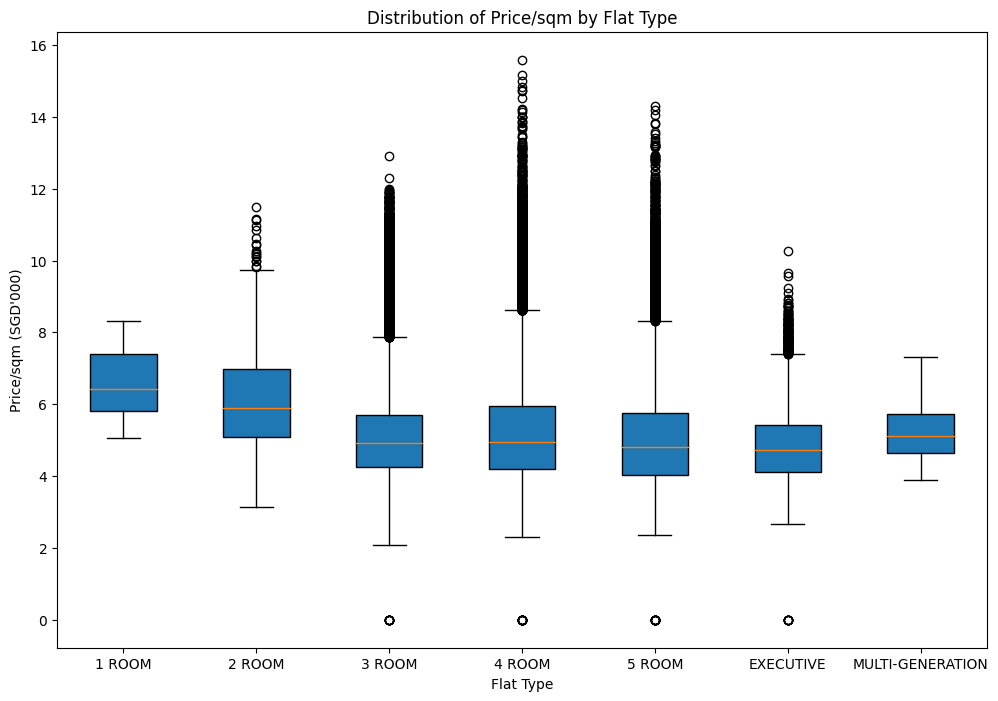

In [ ]:
# Prepare data for boxplot
flat_types = np.unique(sales_data['flat_type'])
ppsm_thousands = sales_data['$psm']/1000
boxplot_data = [ppsm_thousands[sales_data['flat_type'] == flat_type] for flat_type in flat_types]

# Plot the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=flat_types, vert=True, patch_artist=True)
plt.title('Distribution of Price/sqm by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Price/sqm (SGD\'000)')
plt.xticks()
plt.show()


As shown in the pie chart earlier, 4 rooms; 5 rooms; and 3 rooms; had the highest demand which also resulted in more outliers in the boxplot, suggesting  greater variability in price per square metre for these flat type.

### 5.9 Box plot: Distribution of Resale Price by Flat Type

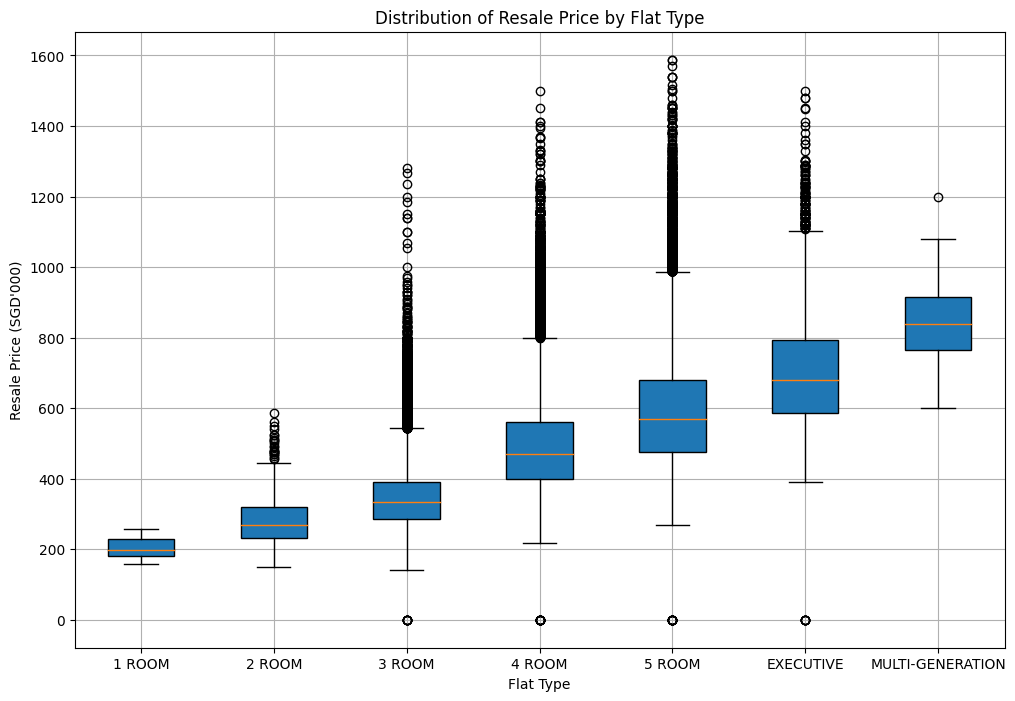

In [ ]:
# Prepare data for boxplot
flat_types = np.unique(sales_data['flat_type'])
resale_price_thousands = sales_data['resale_price']/1000
boxplot_data = [resale_price_thousands[sales_data['flat_type'] == flat_type] for flat_type in flat_types]

# Plot the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=flat_types, vert=True, patch_artist=True)
plt.title('Distribution of Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price (SGD\'000)')
plt.xticks()
plt.grid(True)
plt.show()


### 5.10 Line Chart: *Median* Resale Price Over Time At Selected Town

In [ ]:
def plot_line_chart_towns(data, areas):
    # Extract relevant columns
    months = data['month']
    prices = data['resale_price'] / 1000
    towns = data['town']

    plt.figure(figsize=(12, 8))

    for area in areas:
        # Filter the data for the area
        area_mask = towns == area.upper()
        area_months = months[area_mask]
        area_prices = prices[area_mask]

        # Get unique months for the area
        unique_months = np.unique(area_months)

        # Calculate the average resale price per month for the area
        avg_prices = [np.median(area_prices[area_months == month]) for month in unique_months]

        # Plot the line chart for the area
        plt.plot(unique_months, avg_prices, marker='o', label=area.title())

    plt.title(f'Trend of Median Resale Prices Over Time')
    plt.xlabel('Year')
    plt.ylabel("Median Resale Price (SGD'000)")
    plt.legend(title='Town')

    plt.show()

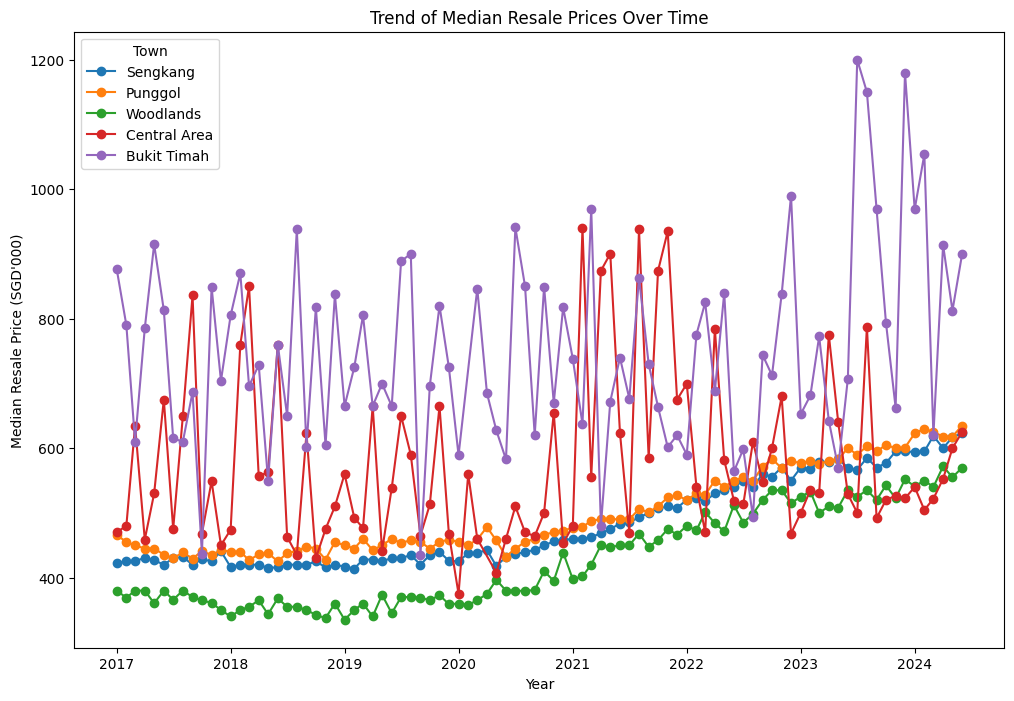

In [ ]:
areas = ['sengkang', 'punggol', 'woodlands', 'central area', 'bukit timah']
plot_line_chart_towns(sales_data, areas)

* The median resale prices have generally increased over time from 2017 to 2024 for most towns.
* Bukit Timah shows the highest volatility and the highest median prices, consistently ranging between 600,000 SGD and 1,200,000 SGD.
* Central Area also exhibits significant fluctuations with prices ranging between 600,000 SGD and 1,000,000 SGD.
* Sengkang, Punggol, and Woodlands have more stable trends with gradual increases, maintaining lower price ranges compared to Bukit Timah and Central Area.

### 5.11 Box plot: Distribution of Resale Price by Storey

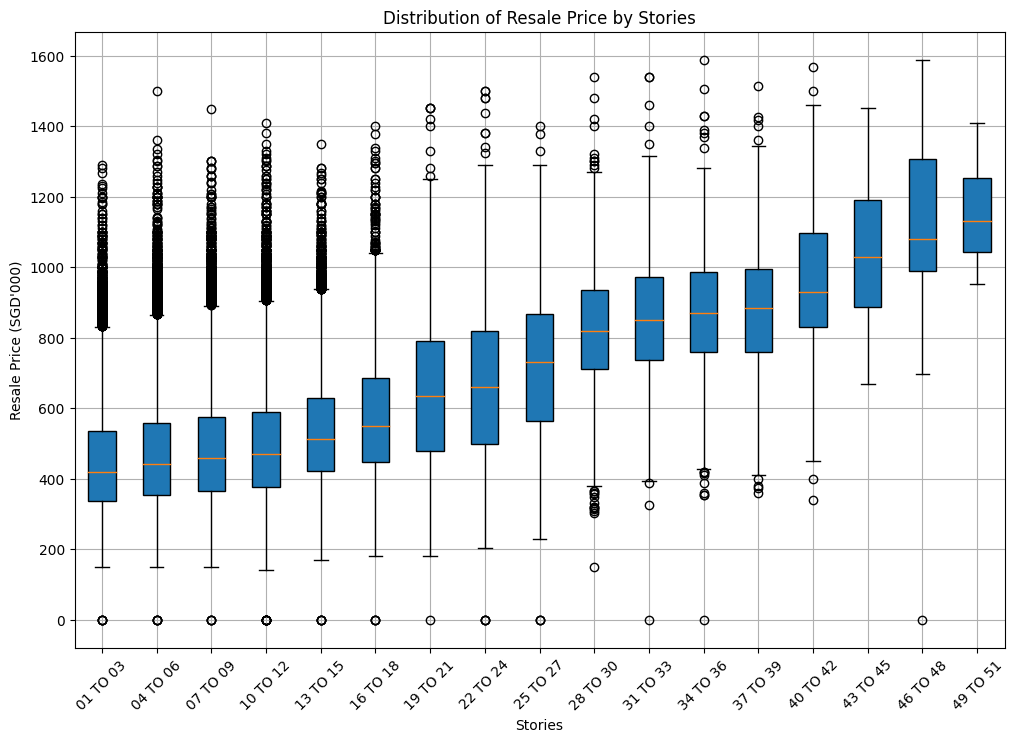

In [ ]:
# Prepare data for boxplot
stories = np.unique(sales_data['storey_range'])
resale_price_thousands = sales_data['resale_price']/1000
boxplot_data = [resale_price_thousands[sales_data['storey_range'] == storey] for storey in stories]

# Plot the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=stories, vert=True, patch_artist=True)
plt.title('Distribution of Resale Price by Stories')
plt.xlabel('Stories')
plt.ylabel('Resale Price (SGD\'000)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


* The median resale price tends to increase as the number of stories in the building increases. Lower story ranges (01 TO 03, 04 TO 06, 07 TO 09, etc.) have lower median prices, typically around 400,000 to 500,000 SGD.
* In contrast, higher story ranges (25 TO 27, 28 TO 30, 31 TO 33, etc.) show significantly higher median prices, often exceeding 600,000 SGD, with the highest story range (49 TO 51) reaching around 900,000 SGD.

## End of Data 1
---



# Start of Data 2: Renting Out of Flats 2024

## 6. Load Data 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fname2 = 'RentingOutofFlats2024CSV.csv'

rent_data = np.genfromtxt(fname2, skip_header=1, delimiter=',',
                     dtype=[('rent_approval_date', 'datetime64[M]'),('town','U50'),('block','U50'),
                            ('street_name','U50'),('flat_type','U50'),('monthly_rent','i8')],
                             missing_values=['na','-'], filling_values=[0])

rent_data[:5]

array([('2021-01', 'ANG MO KIO', '105', 'ANG MO KIO AVE 4', '4-ROOM', 2000),
       ('2021-01', 'ANG MO KIO', '107', 'ANG MO KIO AVE 4', '3-ROOM', 1750),
       ('2021-01', 'ANG MO KIO', '108', 'ANG MO KIO AVE 4', '3-ROOM', 1750),
       ('2021-01', 'ANG MO KIO', '111', 'ANG MO KIO AVE 4', '5-ROOM', 2230),
       ('2021-01', 'ANG MO KIO', '111', 'ANG MO KIO AVE 4', '5-ROOM', 2450)],
      dtype=[('rent_approval_date', '<M8[M]'), ('town', '<U50'), ('block', '<U50'), ('street_name', '<U50'), ('flat_type', '<U50'), ('monthly_rent', '<i8')])

## 7. Data Overview

### 7.1 Data Dimension

In [ ]:
print(f"Number of rows: {len(rent_data)}")
print(f"Number of columns: {len(rent_data[0])}")

Number of rows: 124986
Number of columns: 6


## 8. Data Manipulation

## 9. Descriptive Statistics

### 9.1 Numbers of unique values in each column

In [ ]:
unique_counts = count_unique_values(rent_data)
unique_counts

{'rent_approval_date': 41,
 'town': 26,
 'block': 2742,
 'street_name': 589,
 'flat_type': 6,
 'monthly_rent': 554}

### 9.2 Descriptive Statistic for Monthly Rent

In [ ]:
compute_stats(rent_data, 'monthly_rent')

{'overall': {'mean': 2620.78,
  'median': 2500.0,
  'mode': 2000,
  'min': 300,
  'max': 7600,
  'iqr': 1100.0,
  'count': 124986}}

### 9.3 Descriptive Statistic for Monthly Rent by Town

In [ ]:
mthly_rental_by_town = compute_stats(rent_data, 'monthly_rent', 'town')
mthly_rental_sorted = sort_stats(mthly_rental_by_town, 'mean')
print_stats(mthly_rental_sorted, 'monthly_rent', 'town')


Statistics for Monthly_Rent by Town:

Group: CENTRAL
Mean: 3048.59
Median: 2900.00
Mode: 2500.00
Min: 350.00
Max: 7600.00
Iqr: 1200.00
Count: 1910
----------------------------------------

Group: BUKIT TIMAH
Mean: 2921.22
Median: 2800.00
Mode: 3000.00
Min: 700.00
Max: 5500.00
Iqr: 1237.50
Count: 374
----------------------------------------

Group: BUKIT MERAH
Mean: 2891.32
Median: 2800.00
Mode: 3000.00
Min: 500.00
Max: 6300.00
Iqr: 1150.00
Count: 6771
----------------------------------------

Group: BISHAN
Mean: 2882.44
Median: 2800.00
Mode: 2500.00
Min: 600.00
Max: 5800.00
Iqr: 1100.00
Count: 2776
----------------------------------------

Group: QUEENSTOWN
Mean: 2814.41
Median: 2750.00
Mode: 3000.00
Min: 500.00
Max: 6800.00
Iqr: 1100.00
Count: 5117
----------------------------------------

Group: PASIR RIS
Mean: 2735.90
Median: 2500.00
Mode: 2000.00
Min: 750.00
Max: 5150.00
Iqr: 1100.00
Count: 3440
----------------------------------------

Group: KALLANG/WHAMPOA
Mean: 2693.19
Median:

## 10. Data Visualization

### 10.1 Histogram: Rental Transactions Distribution

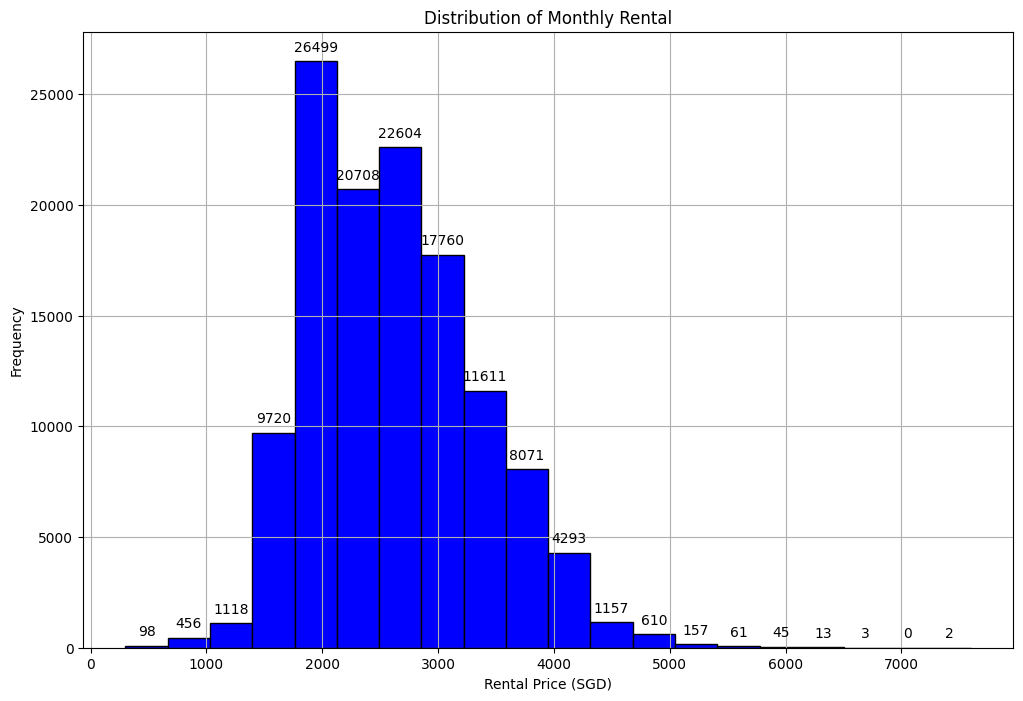

In [ ]:
# Plot the histogram on the number of transactions based on price
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(rent_data['monthly_rent'], bins=20, color='blue', edgecolor='black')

# Add data values to the histogram
for count, patch in zip(counts, patches):
    plt.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, count),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of Monthly Rental')
plt.xlabel("Rental Price (SGD)")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


* The majority of monthly rentals fall within the range of 1,500 to 3,500 SGD. The peak frequency is observed in the 2,000 to 2,500 SGD range, with 26,499 rentals. This indicates that most tenants are paying between 1,500 and 3,500 SGD per month for their rental units.

* The distribution of monthly rental prices is skewed towards the lower end, with a sharp decline in frequency as the rental price increases beyond 3,500 SGD.
* There are significantly fewer rentals priced above 4,000 SGD, with the highest price ranges (6,000 to 7,000 SGD and above) having minimal rentals, highlighting that high-end rental units are much less common.

In [ ]:
compute_stats(rent_data, 'monthly_rent')

{'overall': {'mean': 2620.78,
  'median': 2500.0,
  'mode': 2000,
  'min': 300,
  'max': 7600,
  'iqr': 1100.0,
  'count': 124986}}

### 10.2 Bar Chart: Number of Rental Transactions by Town

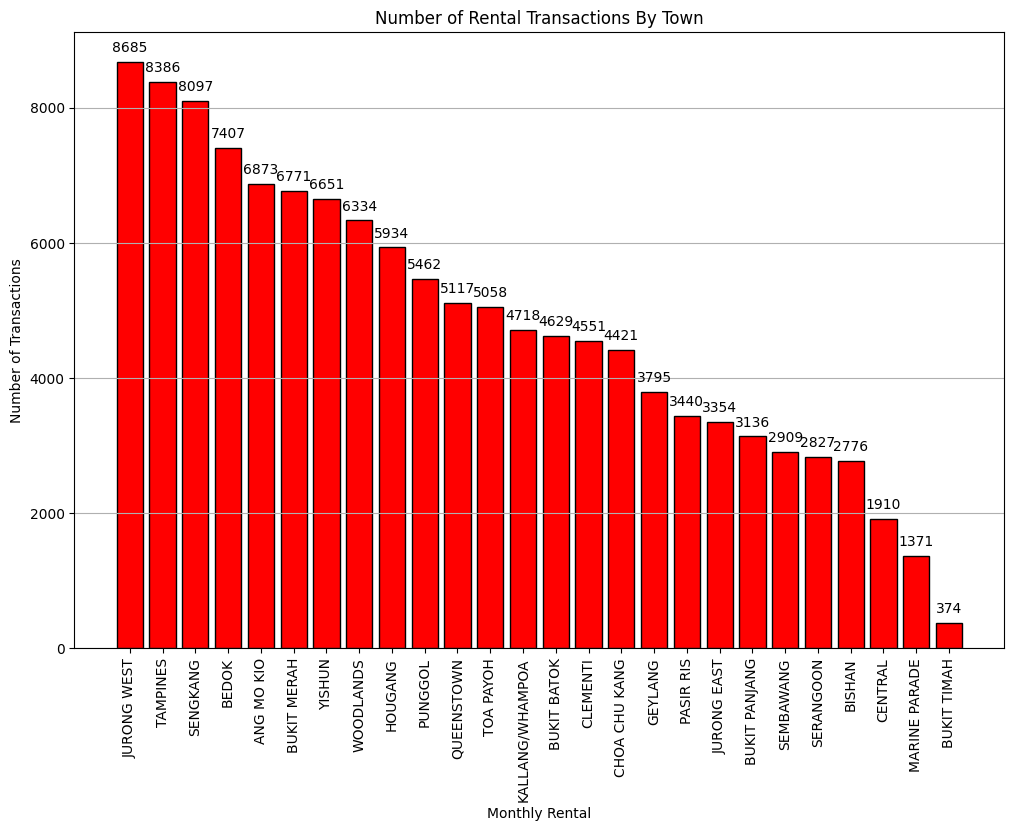

In [ ]:
# Count the occurrences of each town
unique_towns, counts = np.unique(rent_data['town'], return_counts=True)

# Sort the Towns by Count in Descending Order
sorted_indices = np.argsort(counts)[::-1]
sorted_towns = unique_towns[sorted_indices]
sorted_counts = counts[sorted_indices]

# Plot the histogram of the sorted Towns
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_towns, sorted_counts, color='red', edgecolor='black')

# Add data values to the bars
for bar, count in zip(bars, sorted_counts):
    height = bar.get_height()
    plt.annotate(f'{int(count)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Rental Transactions By Town')
plt.xlabel('Monthly Rental')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.grid(True, axis='y')

# Show the plot
plt.show()


* Jurong West, Tampines, and Sengkang have the highest number of rental transactions, with Jurong West leading at 8,685 transactions, followed by Tampines at 8,386 and Sengkang at 8,097.
* These towns are popular rental locations, likely due to their amenities, accessibility, or housing stock.

* On the other end, towns like Bukit Timah, Marine Parade, and Central have significantly fewer rental transactions, with Bukit Timah having the lowest at 374 transactions. This indicates that these areas might have less rental activity, possibly due to higher rental prices, fewer rental properties, or less demand.



### 10.3 Pie Chart: Number of Rental Transactions by Flat Type

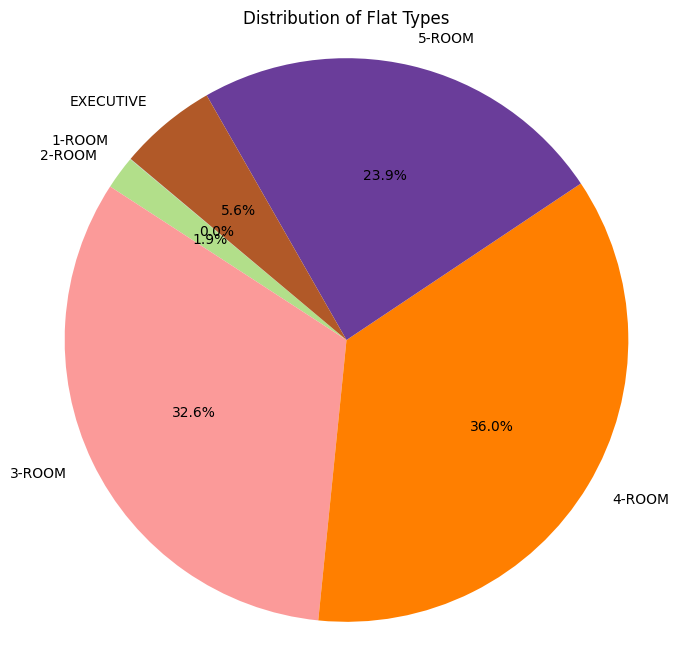

In [ ]:
# Count the occurrences of each flat type
unique_flat_types, flat_counts = np.unique(rent_data['flat_type'], return_counts=True)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(flat_counts, labels=unique_flat_types, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(np.linspace(0, 1, len(unique_flat_types))))
plt.title('Distribution of Flat Types')
plt.axis('equal')
plt.show()


### 10.4 Line Chart: Average Monthly Rent Over Time




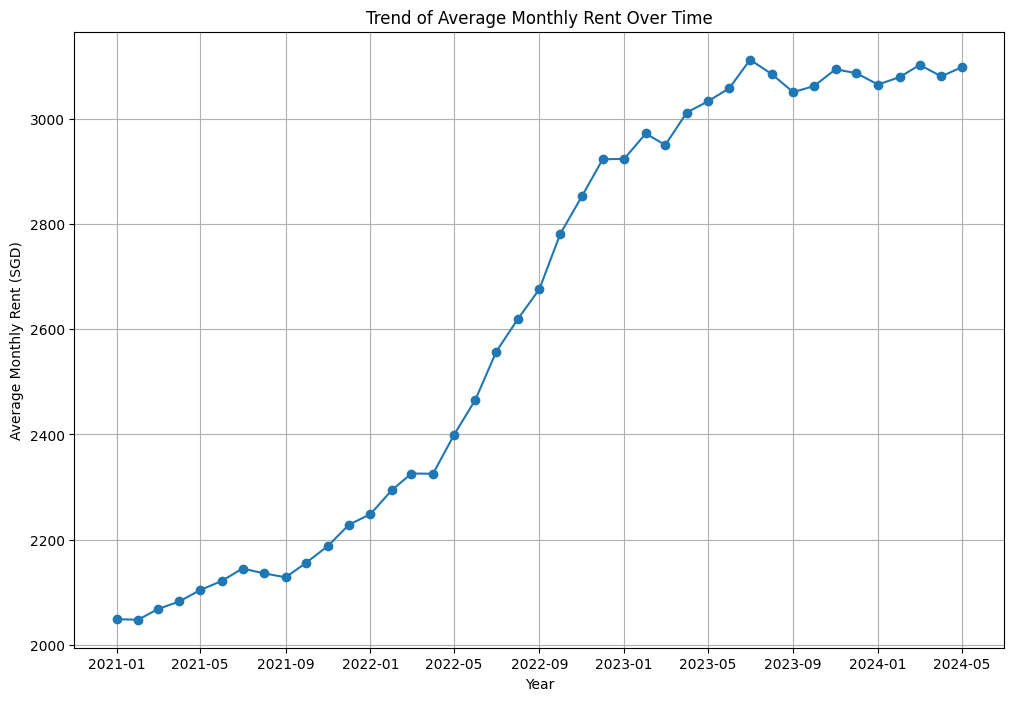

In [ ]:
# Calculate the average resale price per month
months = rent_data['rent_approval_date']
prices = rent_data['monthly_rent']
unique_months = np.unique(months)
average_prices = [np.mean(prices[months == month]) for month in unique_months]

# Plot the line chart
plt.figure(figsize=(12, 8))
plt.plot(unique_months, average_prices, marker='o')
plt.title('Trend of Average Monthly Rent Over Time')
plt.xlabel('Year')
plt.ylabel('Average Monthly Rent (SGD)')
plt.grid(True)
plt.show()


### 10.5 Boxplot: Distribution of Monthly Rent by Town

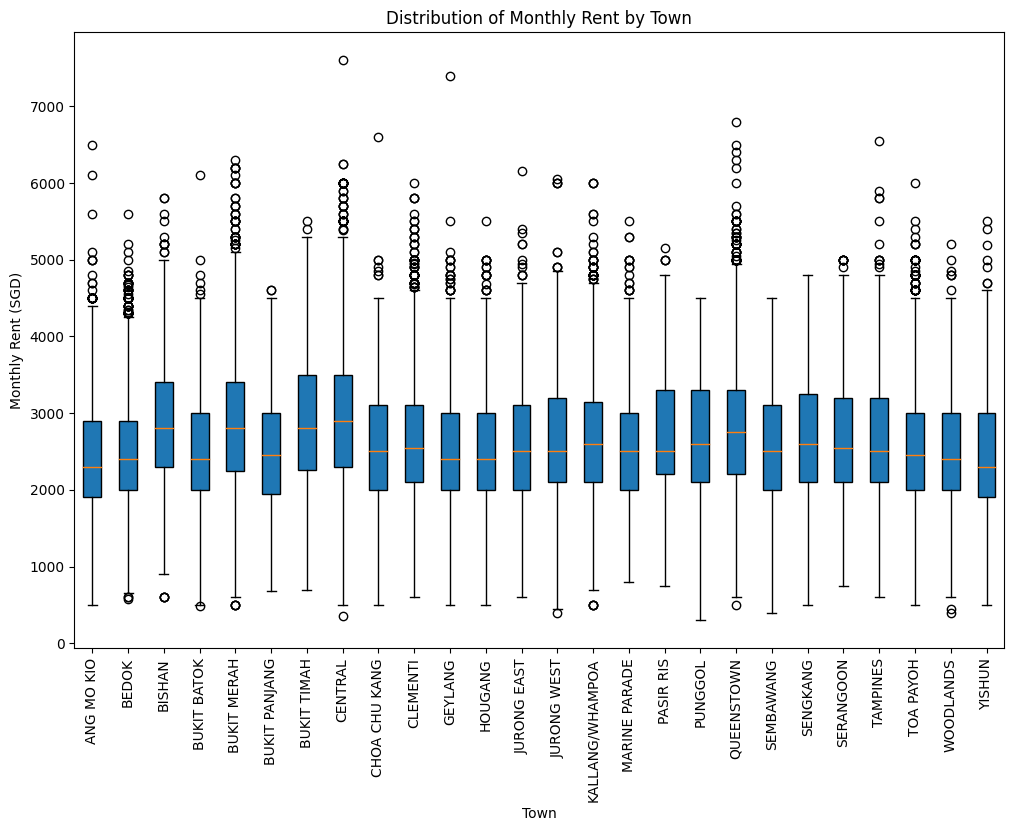

In [ ]:
# Prepare data for boxplot
towns = np.unique(rent_data['town'])
rent_price = rent_data['monthly_rent']
boxplot_data = [rent_price[rent_data['town'] == town] for town in towns]

# Plot the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=towns, vert=True, patch_artist=True)
plt.title('Distribution of Monthly Rent by Town')
plt.xlabel('Town')
plt.ylabel('Monthly Rent (SGD)')
plt.xticks(rotation=90)
plt.show()


* From January 2021 to mid-2023, there has been a substantial and steady increase in the average monthly rent. The rent has risen from around 2,000 SGD in early 2021 to over 3,000 SGD by mid-2023. This indicates a strong upward trend in rental prices over this period. This period happened to coincide with the COVID period, where demand for resale flats and its price has also surged significantly.

* From late 2023 to mid-2024, the average monthly rent appears to have stabilized, hovering around 3,000 SGD. While there are minor fluctuations, the general trend shows that the rapid increase observed in the previous years has levelled off, suggesting a potential plateau in rental price growth. During this period of time, it was where working from home becomes optional and the Government has pushed the production of BTO flats to meet the high

In [ ]:
mthly_rental_by_town = compute_stats(rent_data, 'monthly_rent', 'town')
mthly_rental_town_sorted = sort_stats(mthly_rental_by_town, 'iqr')
print_stats(mthly_rental_town_sorted, 'monthly_rent', 'town')


Statistics for Monthly_Rent by Town:

Group: BUKIT TIMAH
Mean: 2921.22
Median: 2800.00
Mode: 3000.00
Min: 700.00
Max: 5500.00
Iqr: 1237.50
Count: 374
----------------------------------------

Group: CENTRAL
Mean: 3048.59
Median: 2900.00
Mode: 2500.00
Min: 350.00
Max: 7600.00
Iqr: 1200.00
Count: 1910
----------------------------------------

Group: PUNGGOL
Mean: 2693.05
Median: 2600.00
Mode: 2000.00
Min: 300.00
Max: 4500.00
Iqr: 1200.00
Count: 5462
----------------------------------------

Group: BUKIT MERAH
Mean: 2891.32
Median: 2800.00
Mode: 3000.00
Min: 500.00
Max: 6300.00
Iqr: 1150.00
Count: 6771
----------------------------------------

Group: SENGKANG
Mean: 2670.23
Median: 2600.00
Mode: 2000.00
Min: 500.00
Max: 4800.00
Iqr: 1150.00
Count: 8097
----------------------------------------

Group: BISHAN
Mean: 2882.44
Median: 2800.00
Mode: 2500.00
Min: 600.00
Max: 5800.00
Iqr: 1100.00
Count: 2776
----------------------------------------

Group: CHOA CHU KANG
Mean: 2553.92
Median: 2500.

### 10.6 Boxplot: Distribution of Monthly Rent by Flat Type

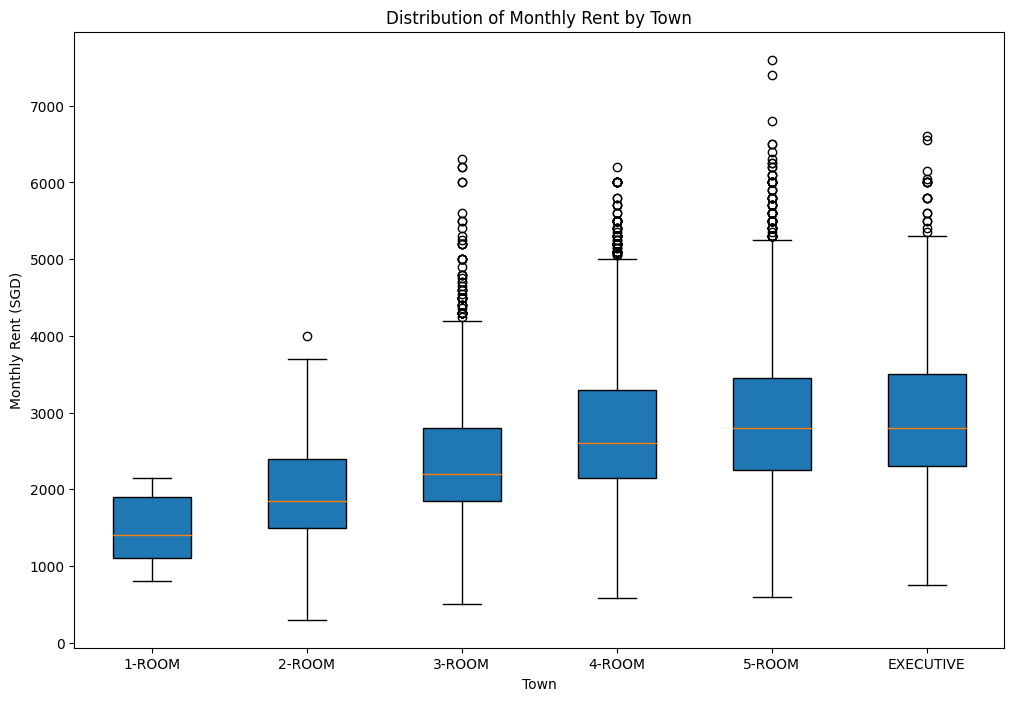

In [ ]:
# Prepare data for boxplot
flat_types = np.unique(rent_data['flat_type'])
rent_price = rent_data['monthly_rent']
boxplot_data = [rent_price[rent_data['flat_type'] == flat_type] for flat_type in flat_types]

# Plot the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=flat_types, vert=True, patch_artist=True)
plt.title('Distribution of Monthly Rent by Town')
plt.xlabel('Town')
plt.ylabel('Monthly Rent (SGD)')
plt.xticks()
plt.show()


In [ ]:
mthly_rental_by_flat = compute_stats(rent_data, 'monthly_rent', 'flat_type')
mthly_rental_flat_sorted = sort_stats(mthly_rental_by_flat, 'mean')
print_stats(mthly_rental_flat_sorted, 'monthly_rent', 'flat_type')


Statistics for Monthly_Rent by Flat_Type:

Group: EXECUTIVE
Mean: 2945.98
Median: 2800.00
Mode: 2500.00
Min: 750.00
Max: 6600.00
Iqr: 1200.00
Count: 7029
----------------------------------------

Group: 5-ROOM
Mean: 2869.27
Median: 2800.00
Mode: 3000.00
Min: 600.00
Max: 7600.00
Iqr: 1200.00
Count: 29865
----------------------------------------

Group: 4-ROOM
Mean: 2732.95
Median: 2600.00
Mode: 2000.00
Min: 580.00
Max: 6200.00
Iqr: 1150.00
Count: 44955
----------------------------------------

Group: 3-ROOM
Mean: 2302.30
Median: 2200.00
Mode: 2000.00
Min: 500.00
Max: 6300.00
Iqr: 950.00
Count: 40703
----------------------------------------

Group: 2-ROOM
Mean: 1893.72
Median: 1850.00
Mode: 2500.00
Min: 300.00
Max: 4000.00
Iqr: 900.00
Count: 2397
----------------------------------------

Group: 1-ROOM
Mean: 1447.97
Median: 1400.00
Mode: 2000.00
Min: 800.00
Max: 2150.00
Iqr: 800.00
Count: 37
----------------------------------------



## End of Data 2
---



# Start of Data 3: HDB Property Information

## 11. Load Data 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# File name
fname3 = 'HDBPropertyInformation.csv'

# Define the data types
dtype = [('blk_no', 'U50'),
         ('street', 'U50'),
         ('max_floor_lvl', 'i8'),
         ('year_completed', 'i8'),
         ('residential', 'U50'),
         ('commercial', 'U50'),
         ('market_hawker', 'U50'),
         ('miscellaneous', 'U50'),
         ('multistorey_carpark', 'U50'),
         ('precinct_pavilion', 'U50'),
         ('bldg_contract_town', 'U50'),
         ('total_dwelling_units', 'i8'),
         ('1room_sold', 'i8'),
         ('2room_sold', 'i8'),
         ('3room_sold', 'i8'),
         ('4room_sold', 'i8'),
         ('5room_sold', 'i8'),
         ('exec_sold', 'i8'),
         ('multigen_sold', 'i8'),
         ('studio_apartment_sold', 'i8'),
         ('1room_rental', 'i8'),
         ('2room_rental', 'i8'),
         ('3room_rental', 'i8'),
         ('other_room_rental', 'i8')]

# Load the data
hdb_data = np.genfromtxt(fname3, delimiter=',', dtype=dtype, names=True, encoding='utf-8')

# Display the first row
hdb_data[:1]



array([('1', 'BEACH RD', 16, 1970, 'Y', 'Y', 'N', 'N', 'N', 'N', 'KWN', 142, 0, 1, 138, 1, 2, 0, 0, 0, 0, 0, 0, 0)],
      dtype=[('blk_no', '<U50'), ('street', '<U50'), ('max_floor_lvl', '<i8'), ('year_completed', '<i8'), ('residential', '<U50'), ('commercial', '<U50'), ('market_hawker', '<U50'), ('miscellaneous', '<U50'), ('multistorey_carpark', '<U50'), ('precinct_pavilion', '<U50'), ('bldg_contract_town', '<U50'), ('total_dwelling_units', '<i8'), ('1room_sold', '<i8'), ('2room_sold', '<i8'), ('3room_sold', '<i8'), ('4room_sold', '<i8'), ('5room_sold', '<i8'), ('exec_sold', '<i8'), ('multigen_sold', '<i8'), ('studio_apartment_sold', '<i8'), ('1room_rental', '<i8'), ('2room_rental', '<i8'), ('3room_rental', '<i8'), ('other_room_rental', '<i8')])

## 12. Data Overview

### 12.1 Data Dimension

In [ ]:
print(f"Number of rows: {len(hdb_data)}")
print(f"Number of columns: {len(hdb_data[0])}")

Number of rows: 12877
Number of columns: 24


### 12.2 Number of unique values in each columns

In [ ]:
count_unique_values(hdb_data)

{'blk_no': 3326,
 'street': 639,
 'max_floor_lvl': 45,
 'year_completed': 69,
 'residential': 2,
 'commercial': 2,
 'market_hawker': 2,
 'miscellaneous': 2,
 'multistorey_carpark': 2,
 'precinct_pavilion': 2,
 'bldg_contract_town': 27,
 'total_dwelling_units': 363,
 '1room_sold': 2,
 '2room_sold': 154,
 '3room_sold': 259,
 '4room_sold': 211,
 '5room_sold': 135,
 'exec_sold': 103,
 'multigen_sold': 7,
 'studio_apartment_sold': 80,
 '1room_rental': 95,
 '2room_rental': 132,
 '3room_rental': 38,
 'other_room_rental': 9}

## 13. Data Manipulation

### 13.1 Create new column total_units_sold

In [ ]:
# Calculate total_units_sold
total_units_sold = (
    hdb_data['1room_sold'] +
    hdb_data['2room_sold'] +
    hdb_data['3room_sold'] +
    hdb_data['4room_sold'] +
    hdb_data['5room_sold'] +
    hdb_data['exec_sold'] +
    hdb_data['multigen_sold'] +
    hdb_data['studio_apartment_sold']
)

# Append the new column to the structured array
hdb_data = add_or_update_col(hdb_data, 'total_units_sold', total_units_sold)

# Print the first few rows to verify
print(f"Number of unique values: {len(np.unique(hdb_data['total_units_sold']))}.\n")
print(hdb_data[:3])

Added new column 'total_units_sold'.

Number of unique values: 333.

[('1', 'BEACH RD', 16, 1970, 'Y', 'Y', 'N', 'N', 'N', 'N', 'KWN', 142, 0, 1, 138, 1, 2, 0, 0, 0, 0, 0, 0, 0, 142)
 ('1', 'BEDOK STH AVE 1', 14, 1975, 'Y', 'N', 'N', 'Y', 'N', 'N', 'BD', 206, 0, 0, 204, 0, 2, 0, 0, 0, 0, 0, 0, 0, 206)
 ('1', 'CANTONMENT RD',  2, 2010, 'N', 'Y', 'N', 'N', 'N', 'N', 'CT',   0, 0, 0,   0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0)]


### 13.2 Create new column total_units_rent

In [ ]:
# Calculate total_units_rented
total_units_rented = (
    hdb_data['1room_rental'] +
    hdb_data['2room_rental'] +
    hdb_data['3room_rental'] +
    hdb_data['other_room_rental']
)

# Append the new column to the structured array
hdb_data = add_or_update_col(hdb_data, 'total_units_rent', total_units_rented)

# Print the first few rows to verify
print(f"Number of unique values: {len(np.unique(hdb_data['total_units_rent']))}.\n")
print(hdb_data[:3])

Added new column 'total_units_rent'.

Number of unique values: 169.

[('1', 'BEACH RD', 16, 1970, 'Y', 'Y', 'N', 'N', 'N', 'N', 'KWN', 142, 0, 1, 138, 1, 2, 0, 0, 0, 0, 0, 0, 0, 142, 0)
 ('1', 'BEDOK STH AVE 1', 14, 1975, 'Y', 'N', 'N', 'Y', 'N', 'N', 'BD', 206, 0, 0, 204, 0, 2, 0, 0, 0, 0, 0, 0, 0, 206, 0)
 ('1', 'CANTONMENT RD',  2, 2010, 'N', 'Y', 'N', 'N', 'N', 'N', 'CT',   0, 0, 0,   0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0)]


### 13.3 Create new column town

In [ ]:
# Mapping dictionary
mapping = {
    'AMK': 'ANG MO KIO', 'BB': 'BUKIT BATOK', 'BD': 'BEDOK', 'BH': 'BISHAN',
    'BM': 'BUKIT MERAH', 'BP': 'BUKIT PANJANG', 'BT': 'BUKIT TIMAH',
    'CCK': 'CHOA CHU KANG', 'CL': 'CLEMENTI', 'CT': 'CENTRAL AREA',
    'GL': 'GEYLANG', 'HG': 'HOUGANG', 'JE': 'JURONG EAST', 'JW': 'JURONG WEST',
    'KWN': 'KALLANG/WHAMPOA', 'MP': 'MARINE PARADE', 'PG': 'PUNGGOL',
    'PRC': 'PASIR RIS', 'QT': 'QUEENSTOWN', 'SB': 'SEMBAWANG',
    'SGN': 'SERANGOON', 'SK': 'SENGKANG', 'TAP': 'TAMPINES', 'TG': 'TENGAH',
    'TP': 'TOA PAYOH', 'WL': 'WOODLANDS', 'YS': 'YISHUN'
}

# Function to map the codes to their full names
def map_town_code(code):
    return mapping.get(code, code)

# Apply the mapping function to the bldg_contract_town column
full_town_name = np.vectorize(map_town_code)(hdb_data['bldg_contract_town'])

# Append the new column to the structured array
hdb_data = add_or_update_col(hdb_data, 'full_town_name', full_town_name)

# Print the first few rows to verify
print(f"Number of unique values: {len(np.unique(hdb_data['full_town_name']))}.\n")
print(hdb_data[:3])

Added new column 'full_town_name'.

Number of unique values: 27.

[('1', 'BEACH RD', 16, 1970, 'Y', 'Y', 'N', 'N', 'N', 'N', 'KWN', 142, 0, 1, 138, 1, 2, 0, 0, 0, 0, 0, 0, 0, 142, 0, 'KALLANG/WHAMPOA')
 ('1', 'BEDOK STH AVE 1', 14, 1975, 'Y', 'N', 'N', 'Y', 'N', 'N', 'BD', 206, 0, 0, 204, 0, 2, 0, 0, 0, 0, 0, 0, 0, 206, 0, 'BEDOK')
 ('1', 'CANTONMENT RD',  2, 2010, 'N', 'Y', 'N', 'N', 'N', 'N', 'CT',   0, 0, 0,   0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 'CENTRAL AREA')]


## 14. Data Visualization

### 14.1 Bar Chart: Number of Transactions by Town

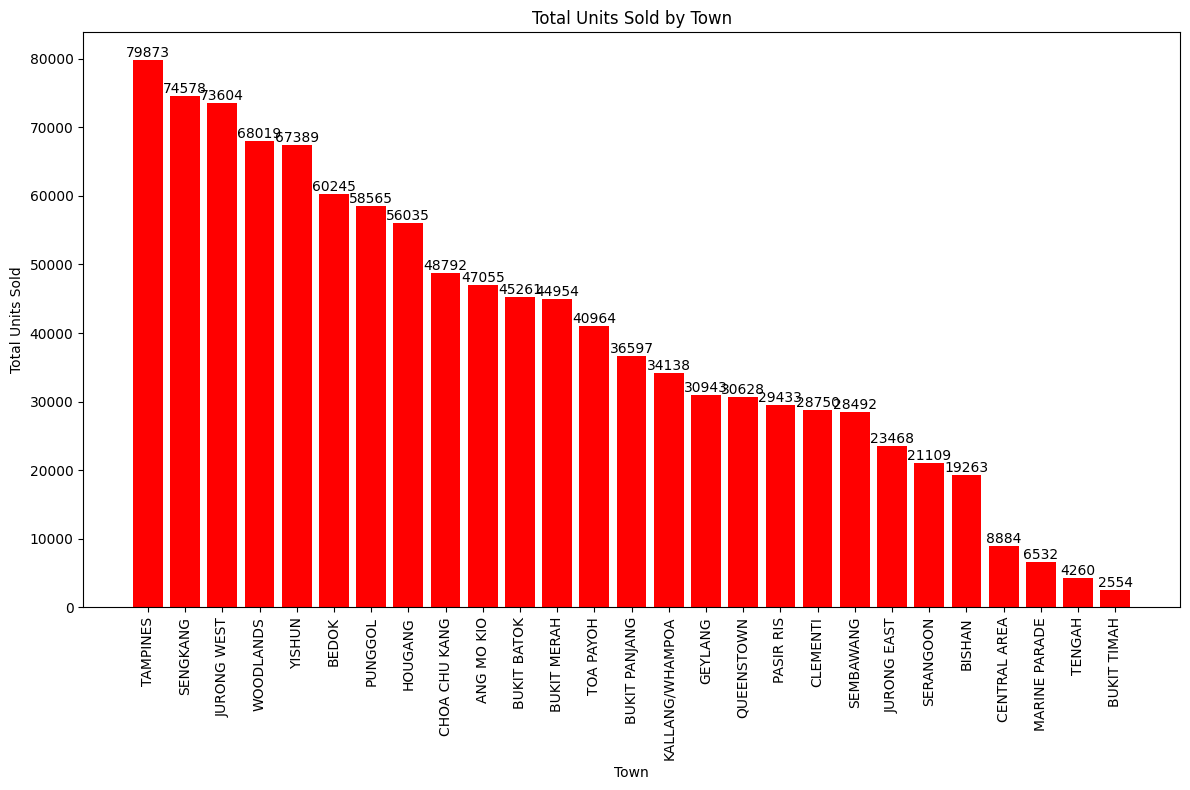

In [ ]:
# Group by town and sum total_units_sold
towns = np.unique(hdb_data['full_town_name'])
total_units_sold_by_town = np.array([np.sum(hdb_data['total_units_sold'][hdb_data['full_town_name'] == town]) for town in towns])

# Sort the data
sorted_indices = np.argsort(total_units_sold_by_town)[::-1]
sorted_towns = towns[sorted_indices]
sorted_total_units_sold = total_units_sold_by_town[sorted_indices]

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_towns, sorted_total_units_sold, color='red')
plt.xlabel('Town')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Town')
plt.xticks(rotation=90)
plt.tight_layout()

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

**Total Units Sold by Town**

1. Tampines has the highest number of units sold, with a total of 79,873 units, indicating a very high demand or large housing stock in this town. Followed by Tampines, Sengkang and Jurong West also have significant numbers of units sold, with 74,578 and 73,604 units respectively.
2. Alot of sales transactions are located in North-East region of Singapore, where it is where the Government are having alot of development intitatives.

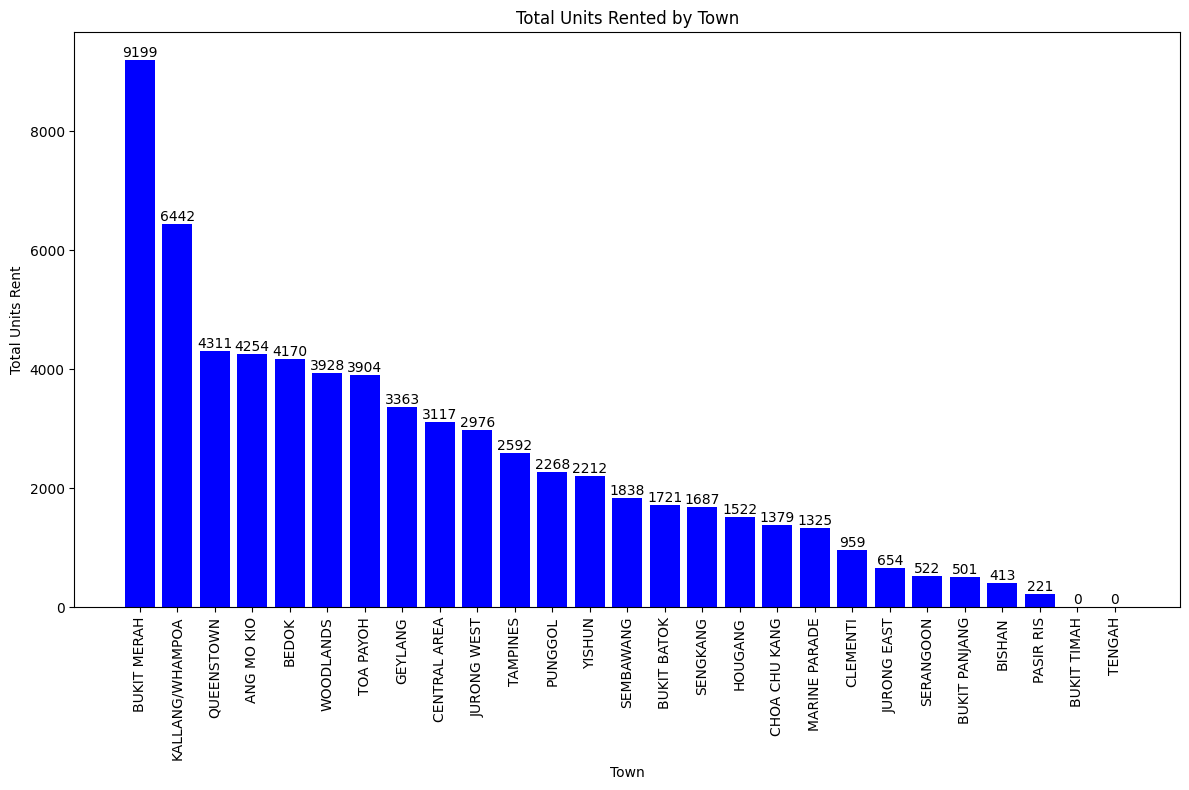

In [ ]:
# Group by town and sum total_units_sold
towns = np.unique(hdb_data['full_town_name'])
total_units_rent_by_town = np.array([np.sum(hdb_data['total_units_rent'][hdb_data['full_town_name'] == town]) for town in towns])

# Sort the data
sorted_indices = np.argsort(total_units_rent_by_town)[::-1]
sorted_towns = towns[sorted_indices]
sorted_total_units_sold = total_units_rent_by_town[sorted_indices]

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_towns, sorted_total_units_sold, color='b')
plt.xlabel('Town')
plt.ylabel('Total Units Rent')
plt.title('Total Units Rented by Town')
plt.xticks(rotation=90)
plt.tight_layout()

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

**Total Units Rented by Town**:

1. Bukit Merah has the highest number of rented units, with 9199 units, far exceeding other towns.
2. Next two highest towns are Kallang/Whampoa and Queenstown, with 6442 and 4311 rented units respectively.
3. Overall, town area seems to attract alot rentals, but the trend oppose number of units sold in each town.

## End of Data 3
---



# 00. Function Library

In [ ]:
# Function to check if column exist or add new in data
def add_or_update_col(data, col_name, new_data):
  import numpy.lib.recfunctions as rfn
  # Check if column already exits
  if col_name in data.dtype.names:
    print(f"Column {col_name} already exists. Updating values.\n")
    data[col_name] = new_data
  else:
    # Add new column to the structured array
    data = rfn.append_fields(data, col_name, new_data, usemask=False)
    print(f"Added new column '{col_name}'.\n")

  return data


  # Function to classify the data types into Qualitative and Quantitative
def classify_dtype(dtype):
  if np.issubdtype(dtype, np.number):
    return 'Quantitative'
  elif np.issubdtype(dtype, np.str_):
    return 'Qualitative'
  elif np.issubdtype(dtype, np.datetime64):
    return 'Quantitative'
  else:
    return 'Others'

# Function to further classify qualitative data
def classify_qualitative(data, column_name):
  unique_values = np.unique(data[column_name])
  if len(unique_values) <= 10:  # Arbitrary threshold for example
    return 'Nominal'
  else:
    return 'Ordinal'

# Function to further classify quantitative data
def classify_quantitative(data, column_name):
    unique_values = np.unique(data[column_name])
    if np.issubdtype(unique_values.dtype, np.number):
      if np.all(np.floor(unique_values) == unique_values):
        return 'Discrete'
      else:
        return 'Continuous'
    else:
        return 'Others'


# Function to classify town
def classify_town(town):
    if town.title() in mature_estate:
        return 'Mature Estate'
    elif town.title() in non_mature_estate:
        return 'Non-mature Estate'
    else:
        return 'Unknown'


def compute_stats(data, col_name, grp=None, filter_value=None):
    # Function to calculate mode using numpy
    def calculate_mode(arr):
        values, counts = np.unique(arr, return_counts=True)
        max_count_index = np.argmax(counts)
        return values[max_count_index]

    # Function to calculate statistics for a given array
    def calculate_stats(arr):
        arr = arr[arr >= 0]  # Exclude invalid values (negative values)
        mean = np.mean(arr)
        mean = np.round(mean, 2)
        median = np.median(arr)
        mode = calculate_mode(arr)
        min_val = np.min(arr)
        max_val = np.max(arr)
        q1 = np.percentile(arr, 25)
        q3 = np.percentile(arr, 75)
        iqr = q3 - q1
        count = len(arr)
        return {
            'mean': mean,
            'median': median,
            'mode': mode,
            'min': min_val,
            'max': max_val,
            'iqr': iqr,
            'count': count
        }

    # Prepare a dictionary to store results
    results = {}

    if grp is not None and filter_value is not None:
        # Filter the data by the specified group
        filter_mask = data[grp] == filter_value
        filtered_data = data[filter_mask]
    else:
        filtered_data = data

    # Extract relevant columns
    column_data = filtered_data[col_name]
    group_data = filtered_data[grp] if grp is not None else None

    # Calculate the statistics for the filtered data
    if group_data is not None:
        unique_groups = np.unique(group_data)

        for group in unique_groups:
            group_mask = group_data == group
            group_column_data = column_data[group_mask]

            results[group] = calculate_stats(group_column_data)
    else:
        results['overall'] = calculate_stats(column_data)

    return results


# Create function to count unique values in each column
def count_unique_values(data):
  # prep dict to store the number of unique values for each column
  unique_counts = {}

  # Loop through each column in the structured array
  for column_name in data.dtype.names:
    unique_counts[column_name] = len(np.unique(data[column_name]))

  return unique_counts


# Create a Function to convert "years months" to total months
def convert_to_months(lease):
  import re

  # First pattern: matches "X years Y months"
  match = re.match(r"(\d+) years? (\d+) months?", lease) # if cell "(\d+) years" & "(\d+) months" matches,
  if match:
      years = int(match.group(1)) # if true convert years into int
      months = int(match.group(2)) # if true convert months into int
      return years * 12 + months

  # Second pattern: matches "X years"
  match = re.match(r"(\d+) years?", lease)
  if match:
      years = int(match.group(1))
      return years * 12

  # Third pattern: matches "Y months"
  match = re.match(r"(\d+) months?", lease)
  if match:
      months = int(match.group(1))
      return months

  # Default return value if 0/3 pattern matches
  return 0
